Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [1]:
# Install TensorFlow and Keras
!pip install --upgrade tensorflow keras

# Import TensorFlow and Keras
import tensorflow as tf
from keras import __version__ as keras_version

# Print their versions
print(f'TensorFlow version: {tf.__version__}')
print(f'Keras version: {keras_version}')


TensorFlow version: 2.17.0
Keras version: 3.4.1


In [2]:
# Print their versions
print(f'TensorFlow version: {tf.__version__}')
print(f'Keras version: {keras_version}')

TensorFlow version: 2.17.0
Keras version: 3.4.1


Dataset dimensions: (1599, 12)
Null values in the dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6159 - loss: 0.6430 - val_accuracy: 0.7083 - val_loss: 0.5808
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7081 - loss: 0.5582 - val_accuracy: 0.7500 - val_loss: 0.5417
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7416 - loss: 0.5280 - val_accuracy: 0.7417 - val_loss: 0.5282
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7509 - loss: 0.5036 - val_accuracy: 0.7417 - val_loss: 0.5190
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7451 - loss: 0.5009 - val_accuracy: 0.7625 - val_loss: 0.5122
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7639 - loss: 0.4721 - val_accuracy: 0.7542 - val_loss: 0.5130
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7638 - loss: 0.4763 - val_accuracy: 0.7708 - val_loss: 0.5094
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7416 - loss: 0.4979 - val_accuracy: 0.7583 - v

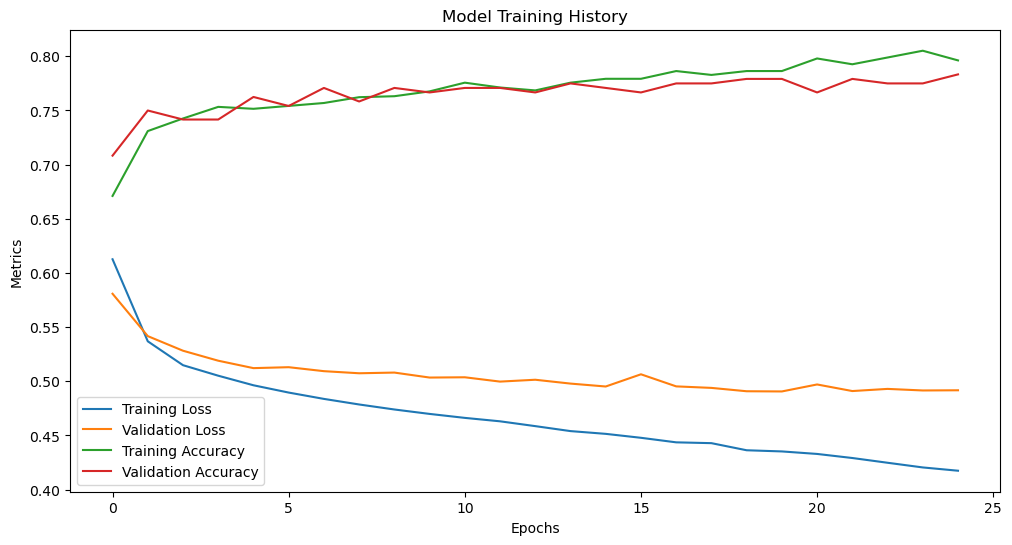

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.8011 - loss: 0.4653
Test Loss: 0.4939424395561218, Test Accuracy: 0.7833333611488342


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Q2. Load the Wine Quality dataset and explore its dimensions.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
print(f'Dataset dimensions: {data.shape}')

# Q3. Check for null values, identify categorical variables, and encode them.
print(f'Null values in the dataset:\n{data.isnull().sum()}')

# Identify categorical variables (if any)
# In this dataset, all features are numeric, so we don't have categorical variables to encode.
# If you had categorical variables, you could use pd.get_dummies or LabelEncoder.

# Q4. Separate the features and target variables from the dataframe.
X = data.drop('quality', axis=1)  # Features
y = data['quality']  # Target variable

# Q5. Perform a train-test split and divide the data into training, validation, and test datasets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Q6. Perform scaling on the dataset.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.
# Note: If 'quality' is treated as a categorical variable, you can use binary classification. 
# Here we can convert 'quality' to binary (e.g., quality > 5) for simplicity.

y_train_binary = (y_train > 5).astype(int)
y_val_binary = (y_val > 5).astype(int)
y_test_binary = (y_test > 5).astype(int)

# Q8. Create a Sequential model and add all the layers to it.
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.
tensorboard_callback = TensorBoard(log_dir='./logs')

# Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# Q11. Implement a ModelCheckpoint callback to save the best model.
checkpoint_callback = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Q12. Print the model summary.
model.summary()

# Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Q14. Compile the model with the specified loss function, optimizer, and metrics.
# (Already done in the previous step)

# Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint callbacks.
history = model.fit(X_train_scaled, y_train_binary, 
                    validation_data=(X_val_scaled, y_val_binary),
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[tensorboard_callback, early_stopping_callback, checkpoint_callback])

# Q16. Get the model's parameters.
model_params = model.count_params()
print(f'Model parameters: {model_params}')

# Q17. Store the model's training history as a Pandas DataFrame.
history_df = pd.DataFrame(history.history)

# Q18. Plot the model's training history.
plt.figure(figsize=(12, 6))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

# Q19. Evaluate the model's performance using the test data.
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_binary)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
